# Sleep Health & Lifestyle Analysis

Descriptive statistics and visuals for the Sleep Health and Lifestyle dataset (374 individuals). Focus on sleep outcomes and how activity/vitals relate to reported sleep disorders. Missing values in  are treated as  during cleaning.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (8, 5)

DATA_PATH = Path("data/sleep_health_and_lifestyle_dataset-sleep_health_and_lifestyle_dataset.csv")
raw = pd.read_csv(DATA_PATH)
df = raw.copy()
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

rows, cols = df.shape
print(f"Loaded {rows} rows and {cols} columns after cleaning Sleep Disorder NAs -> 'None'")
raw.head()

/home/ohara/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Loaded 374 rows and 13 columns after cleaning Sleep Disorder NAs -> 'None'


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Description & Cleaning

Requested data type examples:
- **Continuous variable:**  (hours, real-valued)
- **Integer variable:**  (count per day)
- **Ordinal categorical variable:**  (1–10 ordered scale)
- **Nominal categorical variable:**  (unordered categories)

Cleaning note:  had 219 missing values; they are replaced with  to avoid skewing group comparisons.


In [2]:
summary_before = raw.isna().sum().rename('missing_raw')
summary_after = df.isna().sum().rename('missing_clean')
summary = pd.concat([summary_before, summary_after], axis=1)
summary

,missing_raw,missing_clean
Person ID,0,0
Gender,0,0
Age,0,0
Occupation,0,0
Sleep Duration,0,0
Quality of Sleep,0,0
Physical Activity Level,0,0
Stress Level,0,0
BMI Category,0,0
Blood Pressure,0,0


**Categorical snapshot:** Sleep disorder mix within each BMI category (stacked proportions in one plot).

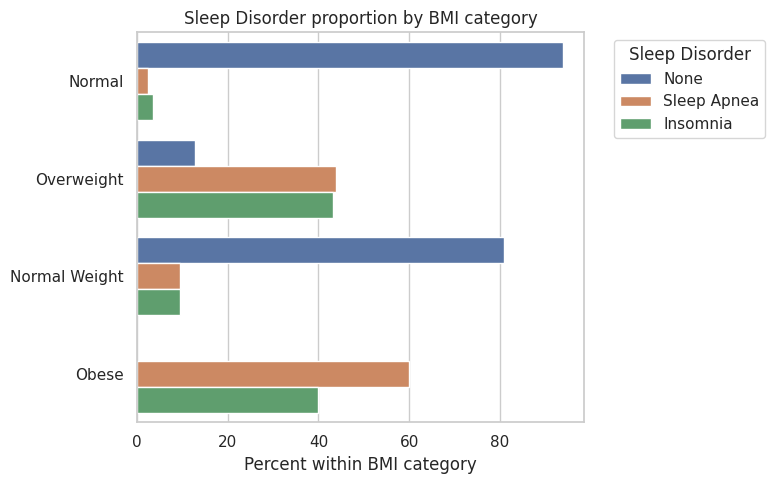

In [3]:
order_bmi = df["BMI Category"].value_counts().index
order_sd = df["Sleep Disorder"].value_counts().index

# Compute percent of each sleep disorder within BMI category
counts = df.groupby(["BMI Category", "Sleep Disorder"]).size().reset_index(name="count")
counts["percent"] = counts.groupby("BMI Category")["count"].transform(lambda s: s / s.sum() * 100)

ax = sns.barplot(
    data=counts,
    y="BMI Category",
    x="percent",
    hue="Sleep Disorder",
    order=order_bmi,
    hue_order=order_sd
)
ax.set_title("Sleep Disorder proportion by BMI category")
ax.set_xlabel("Percent within BMI category")
ax.set_ylabel("")
ax.legend(title="Sleep Disorder", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


## Physical Activity & Sleep Disorder

Overall center/skew plus how activity differs by sleep-disorder status. Because NAs were filled with , group comparisons avoid dropping 219 rows.


In [4]:
pa = df["Physical Activity Level"]
pa_stats = pd.DataFrame({
    "value": [
        round(pa.mean(), 2),
        pa.median(),
        pa.mode().iloc[0],
        round(pa.skew(), 3)
    ]
}, index=["Mean (minutes)", "Median (minutes)", "Mode (minutes)", "Skewness"])
pa_stats


,value
Mean (minutes),59.170
Median (minutes),60.000
Mode (minutes),60.000
Skewness,0.074


In [5]:
pa_by_sd = df.groupby("Sleep Disorder")["Physical Activity Level"].agg(["count", "mean", "median", "std"])
pa_by_sd.round(2)


,count,mean,median,std
Sleep Disorder,,,,
Insomnia,77,46.82,45.0,11.75
None,219,57.95,60.0,20.93
Sleep Apnea,78,74.79,75.0,17.93


**Visual:** Overall distribution + boxplot split by sleep disorder (two subplots). Note sample-specific pattern: Sleep Apnea group shows higher activity here, but this dataset is synthetic and does not imply causation.


/tmp/ipykernel_833/2146002721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Physical Activity Level", y="Sleep Disorder", ax=axes[1], palette="Set2")


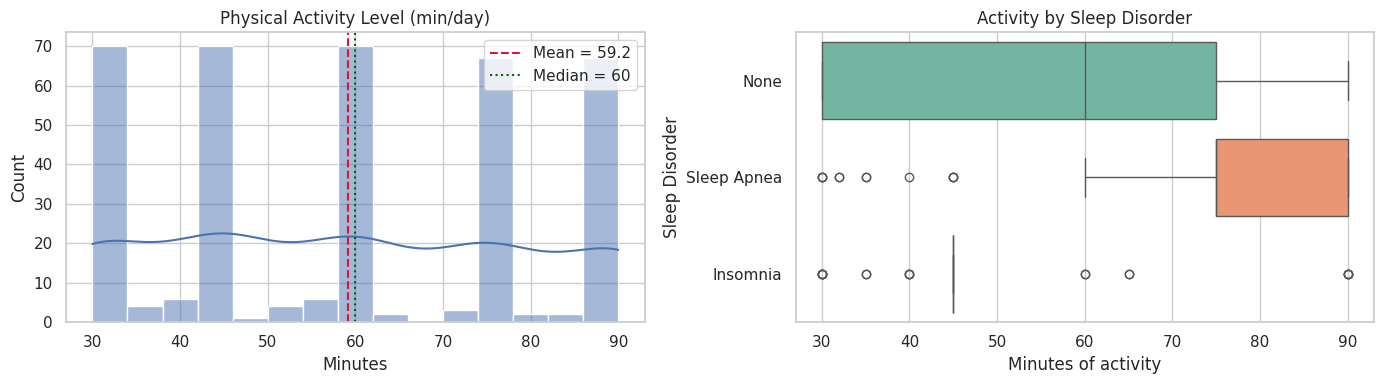

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(pa, bins=15, kde=True, color="#4c72b0", ax=axes[0])
axes[0].axvline(pa.mean(), color="crimson", linestyle="--", label=f"Mean = {pa.mean():.1f}")
axes[0].axvline(pa.median(), color="darkgreen", linestyle=":", label=f"Median = {pa.median():.0f}")
axes[0].set_title("Physical Activity Level (min/day)")
axes[0].set_xlabel("Minutes")
axes[0].legend()

sns.boxplot(data=df, x="Physical Activity Level", y="Sleep Disorder", ax=axes[1], palette="Set2")
axes[1].set_title("Activity by Sleep Disorder")
axes[1].set_xlabel("Minutes of activity")
axes[1].set_ylabel("Sleep Disorder")

plt.tight_layout()
plt.show()


## Sleep Duration & Quality by Disorder

Sleep-specific view keeps sleep central to the analysis.


/tmp/ipykernel_833/3808198330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sleep Duration", y="Sleep Disorder", ax=axes[0], palette="pastel")
/tmp/ipykernel_833/3808198330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Disorder", ax=axes[1], palette="coolwarm")


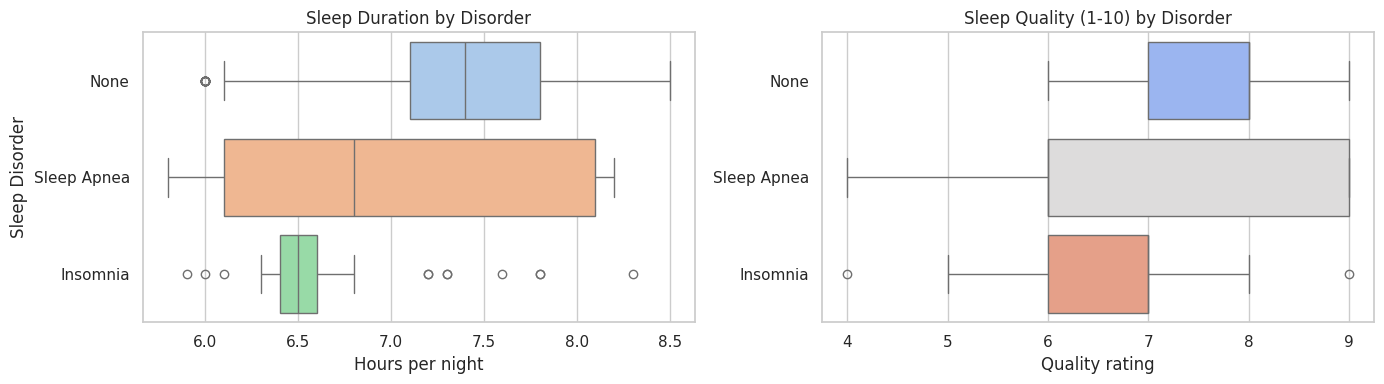

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(data=df, x="Sleep Duration", y="Sleep Disorder", ax=axes[0], palette="pastel")
axes[0].set_title("Sleep Duration by Disorder")
axes[0].set_xlabel("Hours per night")
axes[0].set_ylabel("Sleep Disorder")

sns.boxplot(data=df, x="Quality of Sleep", y="Sleep Disorder", ax=axes[1], palette="coolwarm")
axes[1].set_title("Sleep Quality (1-10) by Disorder")
axes[1].set_xlabel("Quality rating")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


## Number of Daily Steps

Measures of spread for step counts.


In [8]:
steps = df["Daily Steps"]
steps_stats = pd.DataFrame({
    "value": [
        steps.std(ddof=1),
        steps.min(),
        steps.max(),
        steps.max() - steps.min(),
        steps.quantile(0.75) - steps.quantile(0.25),
        steps.var(ddof=1),
    ]
}, index=["Standard deviation", "Minimum", "Maximum", "Range", "IQR", "Variance"])
steps_stats.round(2)


,value
Standard deviation,1617.92
Minimum,3000.00
Maximum,10000.00
Range,7000.00
IQR,2400.00
Variance,2617651.14


**Visual:** Distribution and spread of daily steps (two subplots: histogram + boxplot).


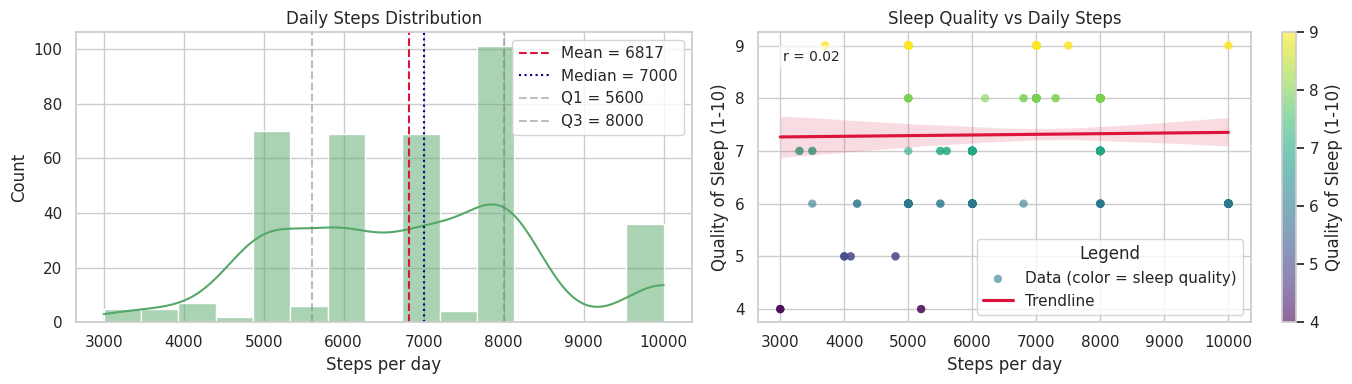

In [9]:
# Daily steps distribution + sleep quality relationship
from matplotlib.lines import Line2D
import matplotlib.cm as cm

steps = df["Daily Steps"]
q1, q3 = steps.quantile([0.25, 0.75])
median_steps = steps.median()

steps_quality = df[["Daily Steps", "Quality of Sleep"]].copy()
steps_quality["steps_quartile"] = pd.qcut(steps_quality["Daily Steps"], 4, labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"])
corr = steps_quality["Daily Steps"].corr(steps_quality["Quality of Sleep"])

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Distribution with spread markers
sns.histplot(steps, bins=15, kde=True, ax=axes[0], color="#55a868")
axes[0].set_title("Daily Steps Distribution")
axes[0].set_xlabel("Steps per day")
axes[0].axvline(steps.mean(), color="crimson", linestyle="--", label=f"Mean = {steps.mean():.0f}")
axes[0].axvline(median_steps, color="navy", linestyle=":", label=f"Median = {median_steps:.0f}")
axes[0].axvline(q1, color="gray", linestyle="--", alpha=0.5, label=f"Q1 = {q1:.0f}")
axes[0].axvline(q3, color="gray", linestyle="--", alpha=0.5, label=f"Q3 = {q3:.0f}")
axes[0].legend()

# Sleep quality vs steps with color-encoded quality
scatter = axes[1].scatter(
    steps_quality["Daily Steps"],
    steps_quality["Quality of Sleep"],
    c=steps_quality["Quality of Sleep"],
    cmap="viridis",
    alpha=0.6,
    edgecolor="none",
    label="Data (color = sleep quality)"
)
sns.regplot(data=steps_quality, x="Daily Steps", y="Quality of Sleep", scatter=False, color="crimson", ax=axes[1], label="Trendline")
axes[1].set_title("Sleep Quality vs Daily Steps")
axes[1].set_xlabel("Steps per day")
axes[1].set_ylabel("Quality of Sleep (1-10)")
axes[1].text(0.05, 0.9, f"r = {corr:.2f}", transform=axes[1].transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

cbar = fig.colorbar(scatter, ax=axes[1])
cbar.set_label("Quality of Sleep (1-10)")
axes[1].legend(loc='lower right', title="Legend")

plt.tight_layout()
plt.show()


**Sleep quality vs daily steps:** Do more steps align with better reported sleep quality? Two views: trendline scatter and boxplot by step quartiles. Pearson r is reported for linear association.

Pearson r (steps vs sleep quality): 0.017


/tmp/ipykernel_833/4131206735.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=steps_quality, x="steps_quartile", y="Quality of Sleep", palette="Blues", ax=axes[1])


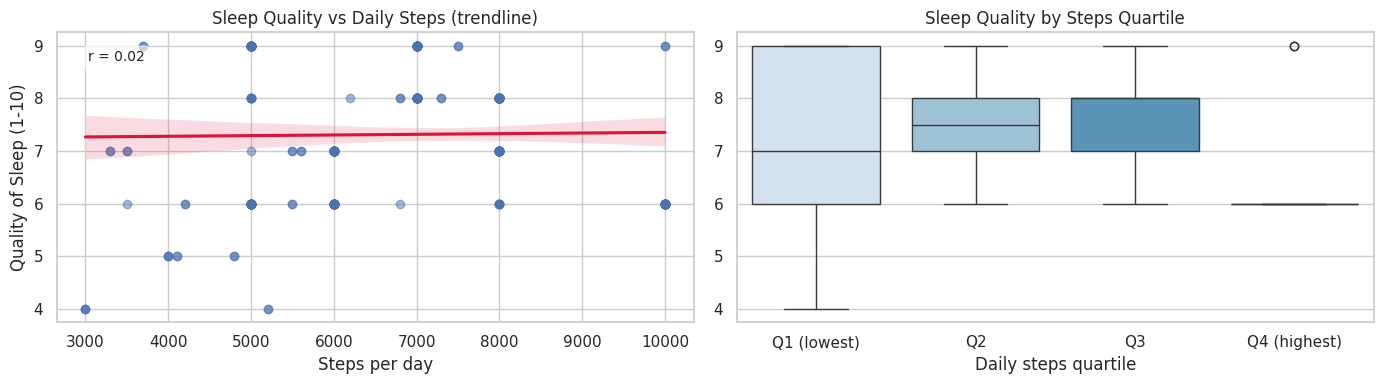

In [10]:
# Steps vs sleep quality
steps_quality = df[["Daily Steps", "Quality of Sleep"]].copy()
steps_quality["steps_quartile"] = pd.qcut(steps_quality["Daily Steps"], 4, labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"])

corr = steps_quality["Daily Steps"].corr(steps_quality["Quality of Sleep"])
print(f"Pearson r (steps vs sleep quality): {corr:.3f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.regplot(data=steps_quality, x="Daily Steps", y="Quality of Sleep", scatter_kws={"alpha":0.5}, line_kws={"color":"crimson"}, ax=axes[0])
axes[0].set_title("Sleep Quality vs Daily Steps (trendline)")
axes[0].set_xlabel("Steps per day")
axes[0].set_ylabel("Quality of Sleep (1-10)")
axes[0].text(0.05, 0.9, f"r = {corr:.2f}", transform=axes[0].transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.6))

sns.boxplot(data=steps_quality, x="steps_quartile", y="Quality of Sleep", palette="Blues", ax=axes[1])
axes[1].set_title("Sleep Quality by Steps Quartile")
axes[1].set_xlabel("Daily steps quartile")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


## Distribution of Heart Rates

Plot and outlier check for resting heart rate (bpm), plus comparison across sleep disorders.


In [11]:
hr = df["Heart Rate"]
hr_stats = pd.DataFrame({
    "value": [hr.mean(), hr.median(), hr.std(ddof=1), hr.min(), hr.max(), hr.skew()]
}, index=["Mean", "Median", "Std", "Min", "Max", "Skewness"])

q1, q3 = hr.quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
outliers = hr[(hr < low) | (hr > high)]

print(hr_stats.round(2))
print()
print(f"IQR: {iqr:.2f}; Outlier bounds: < {low:.2f} or > {high:.2f}")
print(f"Outlier count: {outliers.count()} | Unique outlier values: {sorted(outliers.unique())}")


          value
Mean      70.17
Median    70.00
Std        4.14
Min       65.00
Max       86.00
Skewness   1.22

IQR: 4.00; Outlier bounds: < 62.00 or > 78.00
Outlier count: 15 | Unique outlier values: [80, 81, 82, 83, 84, 85, 86]


**Visual:** Overall heart-rate distribution + disorder-split boxplot (shows right-tail outliers and whether disorders align with higher rates).


/tmp/ipykernel_833/1915548432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Heart Rate", y="Sleep Disorder", ax=axes[1], palette="Set3")


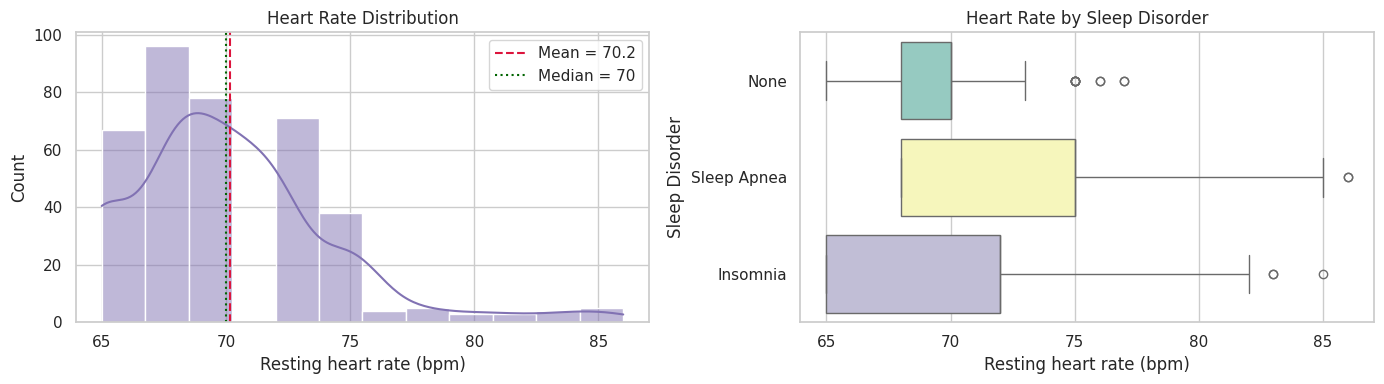

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(hr, bins=12, kde=True, ax=axes[0], color="#8172b3")
axes[0].set_title("Heart Rate Distribution")
axes[0].set_xlabel("Resting heart rate (bpm)")
axes[0].axvline(hr.mean(), color="crimson", linestyle="--", label=f"Mean = {hr.mean():.1f}")
axes[0].axvline(hr.median(), color="darkgreen", linestyle=":", label=f"Median = {hr.median():.0f}")
axes[0].legend()

sns.boxplot(data=df, x="Heart Rate", y="Sleep Disorder", ax=axes[1], palette="Set3")
axes[1].set_title("Heart Rate by Sleep Disorder")
axes[1].set_xlabel("Resting heart rate (bpm)")
axes[1].set_ylabel("Sleep Disorder")

plt.tight_layout()
plt.show()
